In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

In [2]:
from collections import Counter
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import Counter
from collections import OrderedDict
import tensorflow as tf

In [3]:
#Initialize variable here
XRecordsNumber=[]
improvedTestAccuracy=[]
testAccuracy=[]
trainAccuracy=[]
trainStartingIndex=0
trainEndingIndex=trainStartingIndex+200
 

In [4]:
def removeStopeWords(text):
    counts = Counter()
    words = re.compile(r'\w+')
    counts.update(words.findall(text.lower()))

    stop_words1 = list(get_stop_words('en'))         #About 900 stopwords
    nltk_words = list(stopwords.words('english')) #About 150 stopwords
    stop_words1.extend(nltk_words)
    sw_list = ['The',',','.']
    stop_words1.extend(sw_list)
    #text=' '.join(first100)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
    return " ".join(tokens_without_sw)
#print(removeStoeWords('hello of the sanja kanth'))

In [5]:
def lcs(str_a, str_b):#, m, n):
    X=str_a.split(' ')
    Y=str_b.split(' ')
    m=len(str_a.split(' '))
    n=len(str_b.split(' '))
    L = [[0 for x in range(n+1)] for x in range(m+1)]
 
    # Following steps build L[m+1][n+1] in bottom up fashion. Note
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
 
    # Following code is used to print LCS
    index = L[m][n]
 
    # Create a character array to store the lcs string
    lcs = [""] * (index+1)
    lcs[index] = ""
 
    # Start from the right-most-bottom-most corner and
    # one by one store characters in lcs[]
    i = m
    j = n
    while i > 0 and j > 0:
 
        # If current character in X[] and Y are same, then
        # current character is part of LCS
        if X[i-1] == Y[j-1]:
            lcs[index-1] = X[i-1]
            i-=1
            j-=1
            index-=1
 
        # If not same, then find the larger of two and
        # go in the direction of larger value
        elif L[i-1][j] > L[i][j-1]:
            i-=1
        else:
            j-=1
 
    #print (  " ".join(lcs))
    if lcs is None:
        return ""
    else:
        return " ".join(lcs).strip()
    #print ((lcs))
 
# Driver program
 

str_a ="The address mentioned is for vaiga and last name is sanjaikanth so"#"A B C B D A B"# "xBCDxFGxxxKLMx"
str_b ="my name  vaiga sanjaikanth and i am 8"#"B D C A B A"# "aBCDeFGhijKLMn"
m = len(str_a)
n = len(str_b)
#lcs(str_a.split(' '), str_b.split(' '))#, len(str_a.split(' ')), len(str_b.split(' ')))
lcs(str_a, str_b)#, len(str_a.split(' ')), len(str_b.split(' ')))

'name sanjaikanth'

In [6]:
def populateDataFrame(dfCheck,column_names_In):
    dfReturn = pd.DataFrame(columns = column_names_In)
    dfReturn
    for row in dfCheck.itertuples(index=True, name='Pandas'):
        Value1=0
        Value2=0
        Value3=0
        Value4=0
        Value5=0
        Value6=0
        Value7=0
        Value8=0
        Value9=0
        Value10=0
        if column_names_In[0] in row.tweet :
            Value1 =1
        if column_names_In[1] in row.tweet :
            Value2 =1
        if column_names_In[2] in row.tweet :
            Value3 =1
        if column_names_In[3] in row.tweet :
            Value4 =1
        if column_names_In[4] in row.tweet :
            Value5 =1
        if column_names_In[5] in row.tweet :
            Value6 =1
        if column_names_In[6] in row.tweet :
            Value7 =1
        if column_names_In[7] in row.tweet :
            Value8 =1
        if column_names_In[8] in row.tweet :
            Value9 =1
        if column_names_In[9] in row.tweet :
            Value10 =1

        #if Value1==1 or Value2==1 or Value3==1 or Value4==1 or Value5==1 or Value6==1 or Value7==1 or Value8==1 or Value9==1 or Value10==1:
        dr = {column_names_In[0]:Value1, column_names_In[1]:Value2, column_names_In[2]:Value3, column_names_In[3]:Value4
                  , column_names_In[4]:Value5, column_names_In[5]:Value6, column_names_In[6]:Value7, column_names_In[7]:Value8
                  , column_names_In[8]:Value9, column_names_In[9]:Value10
                  ,'XDisinformativeX':row.Disinformative,'XFakeX':row.Fake,
                  'XMisInformativeX':row.MisInformative,'XRealX':row.Real,'XUnverifiedX':row.Unverified}
        dfReturn = dfReturn.append(dr, ignore_index = True)
    
    dfReturn = dfReturn.astype(int)
    dfReturn
    return dfReturn
    #del dfInherited["ID"]

In [7]:
def findLCS(dfIn):
    lstIn=dfIn["tweet"].tolist()
    resultLCS=set()
    for i in  lstIn:
        for j in  lstIn:
            if i != j:
                resultLCS.add(lcs(i, j))
    return list(resultLCS)

In [8]:
def findLongestLCS(dfIn):
    lstLCS=findLCS(dfIn)
    if len(lstLCS)==0:
        return ""
    else:
        return  max(lstLCS, key=len)

In [9]:
def populate_features(strtweet):
    Covidval=0
    CDCval=0
    centerdiseasecontrolval=0
    vaccineval=0
    paymentval=0
    if 'COVID-19' in strtweet :
        Covidval =1
    if 'CDC' in strtweet :
        CDCval =1   
    if 'center disease control' in strtweet :
        centerdiseasecontrolval =1   
    if 'vaccine' in strtweet :
        vaccineval =1   
    if 'payment' in strtweet :
        paymentval =1     
    if Covidval==1 or CDCval==1 or centerdiseasecontrolval==1 or vaccineval==1 or paymentval==1:
        dr = { 'COVID-19': Covidval,  'CDC':CDCval, 'center disease control':centerdiseasecontrolval,
              'vaccine':vaccineval,'payment':paymentval}
    return dr

In [10]:
#Loading Data
df = pd.read_excel('SourceData2022.xlsx')
df

,ID,tweet,label
0,3,The lie that coronavirus came from a bat or a ...,Fake
1,4,The health experts had predicted the virus cou...,Fake
2,8,The Centers for Disease Control and Prevention...,Fake
3,10,Warm weather will kill coronavirus. U.S. Presi...,Unverified
4,15,Using a hair dryer to breathe in hot air can c...,Fake
...,...,...,...
4124,4197,“[The coronavirus is] “new” yet it was lab-cre...,Fake
4125,4199,A post claims that you have to wear a disposab...,Fake
4126,4202,Clickbait / Russian scientists have a cure for...,Fake
4127,4203,Coronavirus outbreak linked to eating bats,Fake


In [11]:
testStartIndex=trainEndingIndex
testEndIndex=testStartIndex+200


#testEndIndex=df.shape[0] #testStartIndex+200
#testStartIndex=testEndIndex-200
print(testStartIndex)
print(testEndIndex)

200
400


In [12]:
for index, row in df.iterrows():
    df.at[index, "tweet"]=removeStopeWords(df.at[index, "tweet"])

In [13]:
df

,ID,tweet,label
0,3,lie coronavirus came bat pangolin concocted Ch...,Fake
1,4,health experts predicted virus kill 65 million...,Fake
2,8,Centers Disease Control Prevention CDC announc...,Fake
3,10,Warm weather kill coronavirus US President Don...,Unverified
4,15,Using hair dryer breathe hot air cure COVID19 ...,Fake
...,...,...,...
4124,4197,coronavirus new yet labcreated patented 2015,Fake
4125,4199,A post claims wear disposable mask blue side s...,Fake
4126,4202,Clickbait Russian scientists cure fighting new...,Fake
4127,4203,Coronavirus outbreak linked eating bats,Fake


In [14]:
colTarget=['XDisinformativeX' ,'XFakeX','XMisInformativeX','XRealX','XUnverifiedX']

In [15]:
#Onehot encoding of labels
one_hot = pd.get_dummies(df['label'])
df = df.join(one_hot)
#del df["ID"]

In [16]:
#Initial find most frequent words
from collections import Counter
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import Counter

counts = Counter()
words = re.compile(r'\w+')
#print(words.findall(first10[0].lower()))
#for sentence in first200:
#    counts.update(words.findall(sentence.lower()))

stop_words1 = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words1.extend(nltk_words)
sw_list = ['The',',','.']
stop_words1.extend(sw_list)
#
#text = first100[0]#"The Nick the likes to play football, however he is not too fond of tennis."#first10[0]
text=' '.join(df[0:200]["tweet"].to_numpy())
text = re.sub(r'[^\w\s]', '', text)
text_tokens = word_tokenize(text)




tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
#print(tokens_without_sw)
counts = Counter(tokens_without_sw)
FirstCols=counts.most_common(10)
most_common_words= [word for word, word_count in FirstCols]
most_common_words

['coronavirus',
 'COVID19',
 'US',
 'new',
 'pandemic',
 'people',
 'outbreak',
 'virus',
 'test',
 'President']

In [17]:
#Creating empty Dataframe
column_names =most_common_words# ["ID","COVID-19", "CDC", "center disease control","vaccine","payment"]

In [18]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
# compile the keras model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
##Starting loop

In [20]:
while trainEndingIndex<df.shape[0] :#testStartIndex :
    #df.itertuples(index=True, name='Pandas')
    dfTrain= df[trainStartingIndex:trainEndingIndex]
    dfTrain

    dfInherited = pd.DataFrame(columns = column_names)
    dfInherited=populateDataFrame(dfTrain,column_names)

    #Converting to array
    dataset=dfInherited.to_numpy()
    dataset


    # split into input (X) and output (y) variables
    XTrain = dataset[:,0:10]
    yTrain = dataset[:,10:]
    print(XTrain[0])
    print(yTrain[0])



    # fit the keras model on the dataset
    model.fit(XTrain, yTrain, epochs=150, batch_size=10, verbose=0)

    # evaluate the keras model
    _, accuracy = model.evaluate(XTrain, yTrain, verbose=0)
    print('Accuracy: %.2f' % (accuracy*100))

    XRecordsNumber.append(trainEndingIndex)
    trainAccuracy.append((accuracy*100))



    most_commonLCS_words=column_names

    XTesttweet=df[testStartIndex:testEndIndex]

    XTest=populateDataFrame (XTesttweet,column_names)
    print("Xtest")
    print(XTest)

    #Converting to array
    dataset=XTest.to_numpy()
    dataset[:,0:10][0]


    XTest = dataset[:,0:10]

    XTest

    predict_x = model.predict(XTest)

    XTesttweet["YXDisinformativeX"]=0
    XTesttweet["YXFakeX"]=0
    XTesttweet["YXFakeX"]=0
    XTesttweet["YXMisInformativeX"]=0
    XTesttweet["YXRealX"]=0
    XTesttweet["YXUnverifiedX"]=0


    for index, row in XTesttweet.iterrows():
        XTesttweet.at[index, "Y"+colTarget[ np.argmax(predict_x[index-testStartIndex], axis=0)]]=1

    XTesttweet


#    metric = tf.keras.metrics.Accuracy()
#    metric.update_state(dataset[ :,10:],XTesttweet.iloc[:,8:].values)
#    metric.result().numpy()*100

 

    # split into input (X) and output (y) variables
    testXActual = dataset[:,0:10]
    testyActual = dataset[:,10:]
    
    #model.fit(XTest, testyActual, epochs=150, batch_size=10, verbose=0)
    # evaluate the keras model
    _, accuracy = model.evaluate(testXActual, testyActual, verbose=0)
    
    testAccuracy.append(accuracy*100)

    dfYFake = XTesttweet[XTesttweet['YXFakeX'] ==1]
    dfYDisinformative = XTesttweet[XTesttweet['YXDisinformativeX'] ==1]
    dfYMisInformative = XTesttweet[XTesttweet['YXMisInformativeX'] ==1]
    dfYReal = XTesttweet[XTesttweet['YXRealX'] ==1]
    dfYUnverified = XTesttweet[XTesttweet['YXUnverifiedX'] ==1]

    print("Longest LCS In Real : "+ findLongestLCS(dfYReal))
    print("Longest LCS In  Fake : "+ findLongestLCS(dfYFake))
    print("Longest LCS In  Disinformative : "+ findLongestLCS(dfYDisinformative))
    print("Longest LCS In  MisInformative : "+ findLongestLCS(dfYMisInformative))
    print("Longest LCS In  Unverified : "+ findLongestLCS(dfYUnverified))

    strLongLCSReal=findLongestLCS(dfYReal)
    strLongLCSFake=findLongestLCS(dfYFake)
    strLongLCSDisinformative=findLongestLCS(dfYDisinformative)
    strLongLCSMisInformative=findLongestLCS(dfYMisInformative)
    strLongLCSUnverified=findLongestLCS(dfYUnverified)



    common_tokens = word_tokenize(strLongLCSReal +" "+strLongLCSFake+" "+ strLongLCSDisinformative+" "+strLongLCSMisInformative
                               + " "+strLongLCSUnverified)
    common_tokens_without_sw = [word for word in common_tokens if not word in stop_words1]

    CommonWordsCounter = Counter(common_tokens_without_sw)
    CommonWordsInOrder=CommonWordsCounter.most_common(10)
    CommonWordsInOrder

    most_commonLCS_words= [word for word, word_count in CommonWordsInOrder]
    most_commonLCS_words


    #appending with intial most common and take first 10

    most_commonLCS_words.extend(most_common_words)
    most_commonLCS_words=list(OrderedDict.fromkeys(most_commonLCS_words))
    most_commonLCS_words=most_commonLCS_words[0:10]
    most_commonLCS_words

    XTesttweet=df[testStartIndex:testEndIndex]
    XTesttweet

    #1testStartIndex=testStartIndex+200
    #1testEndIndex=testStartIndex+200
    column_names=most_commonLCS_words
    print(testStartIndex)
    print(testEndIndex)
    print(column_names)


    XTest=populateDataFrame (XTesttweet,column_names)
    print("Xtest")
    print(XTest)

    #Converting to array
    dataset=XTest.to_numpy()

    # split into input (X) and output (y) variables
    testXActual = dataset[:,0:10]
    testyActual = dataset[:,10:]
    # fit the keras model on the dataset
    model.fit(testXActual, testyActual, epochs=150, batch_size=10, verbose=0)
    # evaluate the keras model
    _, accuracy = model.evaluate(testXActual, testyActual, verbose=0)
    print('Accuracy: %.2f' % (accuracy*100))
    improvedTestAccuracy.append((accuracy*100))
    trainStartingIndex=trainStartingIndex+200
    trainEndingIndex=trainStartingIndex+200
    testStartIndex=testStartIndex+200
    testEndIndex=testStartIndex+200

[1 0 1 0 0 0 0 1 0 0]
[0 1 0 0 0]
Accuracy: 71.50
Xtest
     coronavirus  COVID19  US  new  pandemic  people  outbreak  virus  test  \
0              0        0   0    0         0       0         0      0     0   
1              1        0   0    0         0       0         1      1     0   
2              1        0   0    0         0       0         0      1     0   
3              0        0   0    0         0       0         0      0     0   
4              0        0   0    0         0       0         0      0     0   
..           ...      ...  ..  ...       ...     ...       ...    ...   ...   
195            0        1   0    0         0       0         0      0     0   
196            1        0   0    0         0       0         0      1     0   
197            1        0   0    0         0       0         0      1     0   
198            1        0   0    1         0       0         0      1     0   
199            0        1   0    0         0       0         0      0     0

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In Real : Trump coronavirus outbreak
Longest LCS In  Fake : US President Donald Trump Roche vaccine Coronavirus ready
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
200
400
['Trump', 'coronavirus', 'outbreak', 'US', 'President', 'Donald', 'Roche', 'vaccine', 'Coronavirus', 'ready']
Xtest
     Trump  coronavirus  outbreak  US  President  Donald  Roche  vaccine  \
0        0            0         0   0          0       0      0        0   
1        0            1         1   0          0       0      0        0   
2        0            1         0   0          0       0      0        0   
3        0            0         0   0          0       0      0        0   
4        0            0         0   0          0       0      0        0   
..     ...          ...       ...  ..        ...     ...    ...      ...   
195      0            0         0   0          0       0      0        0   
196      0            1         0   0   

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : presumptive coronavirus confirmed
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : coronavirus Wuhan China
400
600
['coronavirus', 'outbreak', 'novel', '2019nCoV', 'presumptive', 'confirmed', 'Wuhan', 'China', 'COVID19', 'US']
Xtest
     coronavirus  outbreak  novel  2019nCoV  presumptive  confirmed  Wuhan  \
0              0         0      0         0            0          0      0   
1              1         0      0         0            1          1      0   
2              1         0      1         0            0          0      0   
3              0         0      0         0            0          0      0   
4              0         0      0         0            0          0      0   
..           ...       ...    ...       ...          ...        ...    ...   
195            1         0      0         0            0          0      0   
196            0         0      0         0            0          0     

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Video shows President Donald Trump saying COVID19 hoax
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : China novel coronavirus
600
800
['Video', 'shows', 'President', 'Donald', 'Trump', 'saying', 'COVID19', 'hoax', 'China', 'novel']
Xtest
     Video  shows  President  Donald  Trump  saying  COVID19  hoax  China  \
0        0      0          0       0      1       0        0     0      0   
1        0      0          0       0      0       0        0     0      0   
2        0      0          0       0      0       0        0     0      0   
3        0      0          0       0      0       0        1     0      0   
4        0      0          0       0      0       0        0     0      0   
..     ...    ...        ...     ...    ...     ...      ...   ...    ...   
195      0      0          0       0      0       0        0     0      0   
196      0      0          0       0      0       0        0     0      0

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Ruilan Bao Hu San Biotech Limited logo Umbrella Corporation
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
800
1000
['Ruilan', 'Bao', 'Hu', 'San', 'Biotech', 'Limited', 'logo', 'Umbrella', 'Corporation', 'coronavirus']
Xtest
     Ruilan  Bao  Hu  San  Biotech  Limited  logo  Umbrella  Corporation  \
0         0    0   0    0        0        0     0         0            0   
1         0    0   0    0        0        0     0         0            0   
2         0    0   0    0        0        0     0         0            0   
3         0    0   0    0        0        0     0         0            0   
4         0    0   1    0        0        0     0         0            0   
..      ...  ...  ..  ...      ...      ...   ...       ...          ...   
195       0    0   0    0        0        0     0         0            0   
196       0    0   0    0        0        0     0         0            0   
197       0    0 

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : selfquarantine coming contact tested positive coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
1000
1200
['selfquarantine', 'coming', 'contact', 'tested', 'positive', 'coronavirus', 'COVID19', 'US', 'new', 'pandemic']
Xtest
     selfquarantine  coming  contact  tested  positive  coronavirus  COVID19  \
0                 0       0        0       0         0            1        0   
1                 0       0        0       0         0            1        0   
2                 0       0        0       0         0            1        0   
3                 0       0        0       0         0            0        0   
4                 0       0        0       0         0            0        1   
..              ...     ...      ...     ...       ...          ...      ...   
195               0       0        0       0         0            1        0   
196               0       0        0       0        

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In Real : shared Facebook claim coronavirus
Longest LCS In  Fake : throwing money streets money COVID19
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
1200
1400
['money', 'shared', 'Facebook', 'claim', 'coronavirus', 'throwing', 'streets', 'COVID19', 'US', 'new']
Xtest
     money  shared  Facebook  claim  coronavirus  throwing  streets  COVID19  \
0        0       0         0      0            1         0        0        0   
1        0       0         0      0            1         0        0        0   
2        0       0         0      0            1         0        0        0   
3        0       0         0      0            1         0        0        0   
4        0       0         0      0            1         0        0        0   
..     ...     ...       ...    ...          ...       ...      ...      ...   
195      0       0         0      0            0         0        0        0   
196      0       0         

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : India related declared punishable government
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : Korean Infected With coronavirus
1400
1600
['India', 'related', 'declared', 'punishable', 'government', 'Korean', 'Infected', 'With', 'coronavirus', 'COVID19']
Xtest
     India  related  declared  punishable  government  Korean  Infected  With  \
0        0        0         0           0           0       0         0     0   
1        0        0         0           0           0       0         0     0   
2        0        0         0           0           0       0         0     0   
3        0        0         0           0           0       0         0     0   
4        0        0         0           0           0       0         0     0   
..     ...      ...       ...         ...         ...     ...       ...   ...   
195      0        0         0           0           0       0         0     0   
196      0        0  

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Prince Charles meeting singer Kanika Kapoor
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
1600
1800
['Prince', 'Charles', 'meeting', 'singer', 'Kanika', 'Kapoor', 'coronavirus', 'COVID19', 'US', 'new']
Xtest
     Prince  Charles  meeting  singer  Kanika  Kapoor  coronavirus  COVID19  \
0         0        0        0       0       0       0            1        0   
1         0        0        0       0       0       0            0        1   
2         0        0        1       0       0       0            0        1   
3         0        0        0       0       0       0            0        0   
4         0        0        0       0       0       0            0        0   
..      ...      ...      ...     ...     ...     ...          ...      ...   
195       0        0        0       0       0       0            1        0   
196       0        0        0       0       0       0            0        0   
197   

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Indian Ministry Health Family Welfare declaring states
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
1800
2000
['Indian', 'Ministry', 'Health', 'Family', 'Welfare', 'declaring', 'states', 'coronavirus', 'COVID19', 'US']
Xtest
     Indian  Ministry  Health  Family  Welfare  declaring  states  \
0         0         0       0       0        0          0       0   
1         0         0       0       0        0          0       0   
2         1         0       0       0        0          0       0   
3         0         0       0       0        0          0       0   
4         0         0       0       0        0          0       0   
..      ...       ...     ...     ...      ...        ...     ...   
195       0         0       0       0        0          0       0   
196       0         0       0       0        0          0       0   
197       0         0       0       0        0          0       0   
198      

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Spanish politician Ortega Smith said I prefer get gay
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
2000
2200
['Spanish', 'politician', 'Ortega', 'Smith', 'said', 'I', 'prefer', 'get', 'gay', 'coronavirus']
Xtest
     Spanish  politician  Ortega  Smith  said  I  prefer  get  gay  \
0          0           0       0      0     0  0       0    0    0   
1          0           0       0      0     0  0       0    0    0   
2          0           0       0      0     0  0       0    0    0   
3          0           0       0      0     0  0       0    0    0   
4          0           0       0      0     0  0       0    0    0   
..       ...         ...     ...    ...   ... ..     ...  ...  ...   
195        0           0       0      0     0  1       0    0    0   
196        0           0       0      0     0  0       0    0    0   
197        0           0       0      0     0  0       0    0    0   
198        0

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Raúl Rodolfo Khan biochemical engineer Karmalah creator coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
2200
2400
['Raúl', 'Rodolfo', 'Khan', 'biochemical', 'engineer', 'Karmalah', 'creator', 'coronavirus', 'COVID19', 'US']
Xtest
     Raúl  Rodolfo  Khan  biochemical  engineer  Karmalah  creator  \
0       0        0     0            0         0         0        0   
1       0        0     0            0         0         0        0   
2       0        0     0            0         0         0        0   
3       0        0     0            0         0         0        0   
4       0        0     0            0         0         0        0   
..    ...      ...   ...          ...       ...       ...      ...   
195     0        0     0            0         0         0        0   
196     0        0     0            0         0         0        0   
197     0        0     0            0         0        

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : All US 700 USD per week stay home avoid spread COVID19 novel starting March 17
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
2400
2600
['All', 'US', '700', 'USD', 'per', 'week', 'stay', 'home', 'avoid', 'spread']
Xtest
     All  US  700  USD  per  week  stay  home  avoid  spread  \
0      0   0    0    0    0     0     0     0      0       0   
1      0   0    0    0    0     0     0     0      0       0   
2      0   0    0    0    1     0     0     0      0       0   
3      0   0    0    0    0     0     0     0      0       0   
4      0   0    0    0    0     0     0     0      0       0   
..   ...  ..  ...  ...  ...   ...   ...   ...    ...     ...   
195    0   0    0    0    0     0     0     0      0       0   
196    0   0    0    0    0     0     0     0      0       0   
197    0   0    0    0    0     0     0     0      0       0   
198    0   0    0    0    0     0     0     0      0       1   
19

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In Real : contracted coronavirus Instagram past
Longest LCS In  Fake : A times Facebook Twitter alongside claim shows novel coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
2600
2800
['coronavirus', 'contracted', 'Instagram', 'past', 'A', 'times', 'Facebook', 'Twitter', 'alongside', 'claim']
Xtest
     coronavirus  contracted  Instagram  past  A  times  Facebook  Twitter  \
0              1           0          0     0  1      0         0        0   
1              0           0          0     0  0      0         0        0   
2              1           0          0     0  1      0         0        0   
3              1           0          0     0  1      0         0        0   
4              0           0          0     0  1      0         0        0   
..           ...         ...        ...   ... ..    ...       ...      ...   
195            0           0          0     0  0      0         0        0   
196 

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In Real : Hong Kong health workers border China
Longest LCS In  Fake : A thousands times Facebook Twitter alongside claim shows novel coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
2800
3000
['Hong', 'Kong', 'health', 'workers', 'border', 'China', 'A', 'thousands', 'times', 'Facebook']
Xtest
     Hong  Kong  health  workers  border  China  A  thousands  times  \
0       0     0       0        0       0      0  0          0      0   
1       0     0       0        0       0      0  1          0      0   
2       0     0       0        0       0      0  0          0      0   
3       0     0       0        0       0      0  0          0      0   
4       0     0       0        0       0      0  0          0      0   
..    ...   ...     ...      ...     ...    ... ..        ...    ...   
195     0     0       0        0       0      0  1          0      0   
196     0     0       0        0       0      0  0      

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Hello request come house 10 pm tonight till tomorrow 5 As spraying medicine air order kill COVID19 Share information
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : Dr Li Wenliang whistleblower virus cure
3000
3200
['Hello', 'request', 'come', 'house', '10', 'pm', 'tonight', 'till', 'tomorrow', '5']
Xtest
     Hello  request  come  house  10  pm  tonight  till  tomorrow  5  \
0        0        0     0      0   0   0        0     0         0  0   
1        0        0     0      0   0   0        0     0         0  0   
2        0        0     0      0   0   0        0     0         0  0   
3        0        0     0      0   0   0        0     0         0  0   
4        0        0     0      0   0   0        0     0         0  0   
..     ...      ...   ...    ...  ..  ..      ...   ...       ... ..   
195      0        0     0      0   0   0        0     0         0  0   
196      0        0     0      0   0   0     

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : A video viewed thousands times multiple Facebook YouTube posts claim shows novel coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
3200
3400
['A', 'video', 'viewed', 'thousands', 'times', 'multiple', 'Facebook', 'YouTube', 'posts', 'claim']
Xtest
     A  video  viewed  thousands  times  multiple  Facebook  YouTube  posts  \
0    1      0       0          0      0         0         0        0      0   
1    1      1       1          0      1         0         1        1      1   
2    1      0       0          0      0         0         0        0      0   
3    1      0       0          0      0         0         0        0      0   
4    1      0       0          0      0         0         0        0      0   
..  ..    ...     ...        ...    ...       ...       ...      ...    ...   
195  1      0       0          0      0         1         1        0      1   
196  1      0       0          0      

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : A message Stanford hospital gives advice water every 15 order prevent COVID19
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
3400
3600
['A', 'message', 'Stanford', 'hospital', 'gives', 'advice', 'water', 'every', '15', 'order']
Xtest
     A  message  Stanford  hospital  gives  advice  water  every  15  order  \
0    1        0         0         0      0       0      1      0   0      0   
1    0        0         0         0      0       0      0      0   0      0   
2    1        0         0         0      0       0      0      0   0      0   
3    0        0         0         0      0       0      0      0   0      0   
4    0        0         0         0      0       0      0      0   0      0   
..  ..      ...       ...       ...    ...     ...    ...    ...  ..    ...   
195  0        0         0         0      0       0      0      0   0      0   
196  1        0         0         0      0       0      0   

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Breaking News Wuhan Coronavirus update 28012020 amount people infected jumped 2000 almost 4500 people 100 death
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
3600
3800
['people', 'Breaking', 'News', 'Wuhan', 'Coronavirus', 'update', '28012020', 'amount', 'infected', 'jumped']
Xtest
     people  Breaking  News  Wuhan  Coronavirus  update  28012020  amount  \
0         0         0     0      1            1       0         0       0   
1         0         0     0      0            0       0         0       0   
2         0         0     0      0            0       0         0       0   
3         0         0     0      0            0       0         0       0   
4         0         0     0      0            0       0         0       0   
..      ...       ...   ...    ...          ...     ...       ...     ...   
195       0         0     0      0            0       0         0       0   
196       0         0     

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : China seeking courts approval kill positive coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
3800
4000
['China', 'seeking', 'courts', 'approval', 'kill', 'positive', 'coronavirus', 'COVID19', 'US', 'new']
Xtest
     China  seeking  courts  approval  kill  positive  coronavirus  COVID19  \
0        0        0       0         0     0         0            1        0   
1        0        0       0         0     0         0            1        0   
2        0        0       0         0     0         0            0        1   
3        0        0       0         0     0         0            0        1   
4        0        0       0         0     0         0            0        0   
..     ...      ...     ...       ...   ...       ...          ...      ...   
195      0        0       0         0     0         0            0        0   
196      0        0       0         0     0         0            1       

<ipython-input-20-d1c74793bbf7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXDisinformativeX"]=0
<ipython-input-20-d1c74793bbf7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTesttweet["YXFakeX"]=0
<ipython-input-20-d1c74793bbf7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Longest LCS In  Fake : Doctors vitamin C fennel seed tea help avoid novel coronavirus
Longest LCS In  Disinformative : 
Longest LCS In  MisInformative : 
Longest LCS In  Unverified : 
4000
4200
['Doctors', 'vitamin', 'C', 'fennel', 'seed', 'tea', 'help', 'avoid', 'novel', 'coronavirus']
Xtest
     Doctors  vitamin  C  fennel  seed  tea  help  avoid  novel  coronavirus  \
0          0        0  1       0     0    0     0      0      0            0   
1          0        0  1       0     0    0     0      0      0            1   
2          0        0  1       0     0    0     0      0      0            1   
3          0        0  0       0     0    0     0      0      0            1   
4          0        0  0       0     0    0     1      0      0            1   
..       ...      ... ..     ...   ...  ...   ...    ...    ...          ...   
124        0        0  0       0     0    0     0      0      0            1   
125        0        0  0       0     0    0     0      0      0   

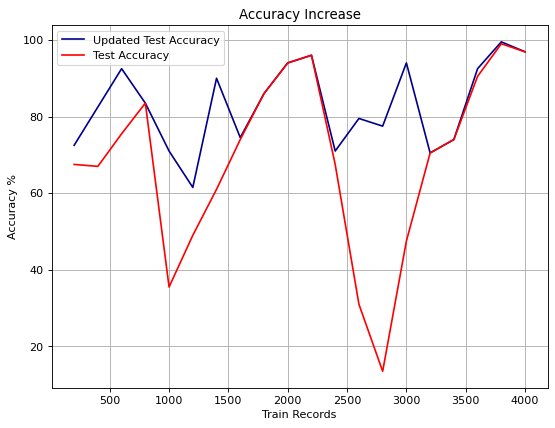

In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title("Accuracy Increase")
plt.plot(XRecordsNumber, improvedTestAccuracy, color='darkblue',  label="Updated Test Accuracy")
plt.plot(XRecordsNumber, testAccuracy, color='red',  label="Test Accuracy")
#plt.plot(XRecordsNumber, trainAccuracy, color='black',  label="Initial Train Accuracy")

plt.xlabel("Train Records")
plt.ylabel("Accuracy %")

plt.grid(True)
plt.legend()

plt.show()